In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from  sklearn.metrics import (roc_auc_score, roc_curve, confusion_matrix,
                             ConfusionMatrixDisplay, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Load the data
training_df = pd.read_csv("./training.csv")

# Data preprocessing
training_df.fillna(0, inplace=True)  # Handle missing values
training_df.drop(['date', 'month'], axis=1, inplace=True)  # Drop irrelevant columns

# Separate features and target
X = training_df.drop('fire', axis=1)
y = training_df['fire']


In [17]:
# Split the data again using selected features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Standardize the features
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)  # Use transform, not fit_transform, on test data

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_transformed, y_train)

In [ ]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res, y_train_res)

# Make predictions
y_pred = knn.predict(X_test_transformed)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[13881  7551]
 [ 3523 17954]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.65      0.71     21432
           1       0.70      0.84      0.76     21477

    accuracy                           0.74     42909
   macro avg       0.75      0.74      0.74     42909
weighted avg       0.75      0.74      0.74     42909


Accuracy Score: 0.741918944743527


In [ ]:

param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_knn = grid_search.best_estimator_

/Users/darshanvijayaraghavan/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.750139824151528


In [23]:
best_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='uniform')
best_knn.fit(X_train_res, y_train_res)
y_pred = best_knn.predict(X_test_transformed)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Confusion Matrix:
 [[15198  6234]
 [ 4073 17404]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75     21432
           1       0.74      0.81      0.77     21477

    accuracy                           0.76     42909
   macro avg       0.76      0.76      0.76     42909
weighted avg       0.76      0.76      0.76     42909


Accuracy Score: 0.7597939826143699


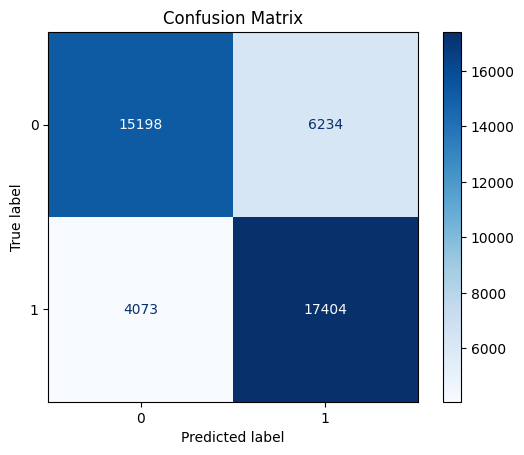

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

AUC-ROC Score: 0.7597409017620924


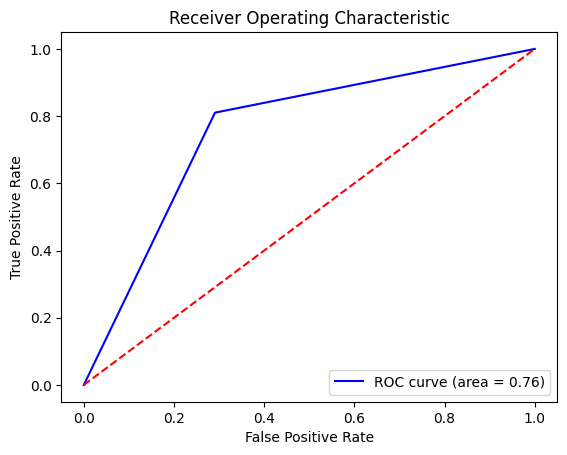

In [25]:
auc_score = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_score)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()